In [1]:
from keras.datasets import imdb
( train_data,train_labels ), ( test_data, test_labels ) =  imdb.load_data( num_words = 10000 ) 
#(train_data, train_labels), (test_data, test_labels) = imdb.load_data()

Using TensorFlow backend.


17465344/17464789 [==============================] - 2s 0us/step


In [2]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i,sequence] = 1.
  return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [4]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [5]:
from keras import models
from keras import layers

In [6]:
model = models.Sequential()
model.add(layers.Dense(32, activation='tanh',input_shape = (10000,)))
model.add(layers.Dense(32,activation='tanh'))
model.add(layers.Dense(32,activation='tanh'))
model.add(layers.Dense(1, activation='sigmoid'))

In [7]:
model.compile(optimizer='rmsprop', loss='mse', metrics=['accuracy'])

In [8]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [12]:
history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 2s 104us/step - loss: 0.0076 - accuracy: 0.9924 - val_loss: 0.1229 - val_accuracy: 0.8625
Epoch 2/20
15000/15000 [==============================] - 2s 103us/step - loss: 0.0187 - accuracy: 0.9785 - val_loss: 0.1141 - val_accuracy: 0.8702
Epoch 3/20
15000/15000 [==============================] - 2s 103us/step - loss: 0.0082 - accuracy: 0.9913 - val_loss: 0.1507 - val_accuracy: 0.8357
Epoch 4/20
15000/15000 [==============================] - 2s 103us/step - loss: 0.0089 - accuracy: 0.9905 - val_loss: 0.1187 - val_accuracy: 0.8691
Epoch 5/20
15000/15000 [==============================] - 2s 104us/step - loss: 0.0137 - accuracy: 0.9855 - val_loss: 0.1506 - val_accuracy: 0.8347
Epoch 6/20
15000/15000 [==============================] - 2s 103us/step - loss: 0.0072 - accuracy: 0.9926 - val_loss: 0.1192 - val_accuracy: 0.8692
Epoch 7/20
15000/15000 [==============================] - 2s 1

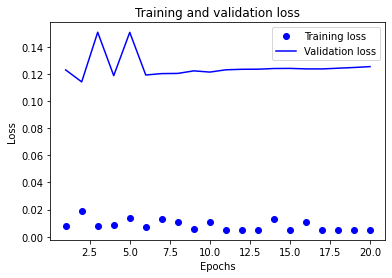

In [13]:
history_dict= history.history
import matplotlib.pyplot as plt
loss_values = history_dict['loss']
acc = history_dict['accuracy']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

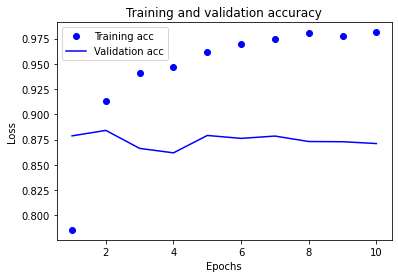

In [11]:
plt.clf()
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()